In [1]:
# for manipulations 
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interativity
from ipywidgets import interact

In [3]:
data = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

In [4]:
data.shape

(2200, 8)

In [5]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
print('average ratio of nitrogen in the soil: {0:.2f}'.format(data['N'].mean()))
print('average ratio of phosphorus in the soil: {0:.2f}'.format(data['P'].mean()))
print('average ratio of potassium in the soil: {0:.2f}'.format(data['K'].mean()))
print('average temperature in required in celsius: {0:.2f}'.format(data['temperature'].mean()))
print('average humidity in %: {0:.2f}'.format(data['humidity'].mean()))
print('average rainfall required in mm: {0:.2f}'.format(data['rainfall'].mean()))
print('average ph of the soil: {0:.2f}'.format(data['ph'].mean()))

average ratio of nitrogen in the soil: 50.55
average ratio of phosphorus in the soil: 53.36
average ratio of potassium in the soil: 48.15
average temperature in required in celsius: 25.62
average humidity in %: 71.48
average rainfall required in mm: 103.46
average ph of the soil: 6.47


In [10]:
# summary statistics of each crop

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print('---------------------------------------------')
    print("statistics of nitrogen: ")
    print('minimum requirement:', x['N'].min())
    print('Average requirement:', x['N'].mean())
    print('maximum requirement:', x['N'].max())
    print('---------------------------------------------')
    print("statistics of phosphorus: ")
    print('minimum requirement:', x['P'].min())
    print('Average requirement:', x['P'].mean())
    print('maximum requirement:', x['P'].max())
    print('---------------------------------------------')
    print("statistics of pottassium: ")
    print('minimum requirement:', x['K'].min())
    print('Average requirement:', x['K'].mean())
    print('maximum requirement:', x['K'].max())
    print('---------------------------------------------')
    print("statistics of Temperature: ")
    print('minimum requirement: {0:.2f}'.format(data['temperature'].min()))
    print('Average requirement: {0:.2f}'.format(data['temperature'].mean()))
    print('maximum requirement: {0:.2f}'.format(data['temperature'].max()))
    print('---------------------------------------------')
    print("statistics of humidity: ")
    print('minimum requirement: {0:.2f}'.format(data['humidity'].min()))
    print('Average requirement: {0:.2f}'.format(data['humidity'].mean()))
    print('maximum requirement: {0:.2f}'.format(data['humidity'].max()))
    print('---------------------------------------------')
    print("statistics of rainfall: ")
    print('minimum requirement: {0:.2f}'.format(data['rainfall'].min()))
    print('Average requirement: {0:.2f}'.format(data['rainfall'].mean()))
    print('maximum requirement: {0:.2f}'.format(data['rainfall'].max()))
    print('---------------------------------------------')
    print("statistics of pH: ")
    print('minimum requirement: {0:.2f}'.format(data['ph'].min()))
    print('Average requirement: {0:.2f}'.format(data['ph'].mean()))
    print('maximum requirement: {0:.2f}'.format(data['ph'].max()))
    print('---------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [11]:
@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print('crops which require greater than average: ', conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print('----------------------------------------------------')
    print('crops which require less than average: ', conditions, '\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

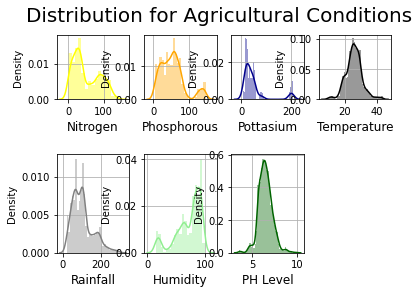

In [12]:
plt.subplot(3,4,1)
sns.distplot(data['N'], color="yellow")
plt.xlabel('Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(3,4,2)
sns.distplot(data['P'], color="orange")
plt.xlabel('Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(3,4,3)
sns.distplot(data['K'], color="darkblue")
plt.xlabel('Pottasium', fontsize = 12)
plt.grid()

plt.subplot(3,4,4)
sns.distplot(data['temperature'], color="black")
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['rainfall'], color="grey")
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['humidity'], color="lightgreen")
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['ph'], color="darkgreen")
plt.xlabel('PH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [13]:
#Checking that crops those have unusual requirements

print("Some Interesting Patterns")
print("...........................................")
print("Crops that require very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops that require very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops that require very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops that require very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops that require very Low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Crops that require very High Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops that require very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops that require very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops that require very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
...........................................
Crops that require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops that require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops that require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops that require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops that require very Low Temperature: ['grapes']
Crops that require very High Temperature: ['grapes' 'papaya']
Crops that require very Low Humidity: ['chickpea' 'kidneybeans']
Crops that require very Low pH: ['mothbeans']
Crops that require very High pH: ['mothbeans']


In [14]:
#Checking which crop to be grown according to the season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("...........................................")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("...........................................")
print("Monsoon Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
...........................................
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
...........................................
Monsoon Crops
['rice' 'papaya' 'coconut']


In [15]:
from sklearn.cluster import KMeans

#removing the labels column
x = data.drop(['label'], axis=1)

#selecting all the values of data
x = x.values

#checking the shape
print(x.shape)

(2200, 7)


<function matplotlib.pyplot.show>

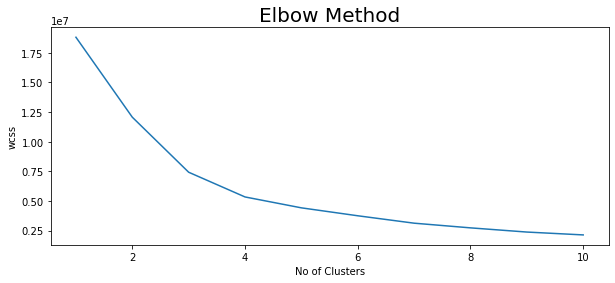

In [16]:
#Determining the optimum number of clusters within the Dataset

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Plotting the results

plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show

In [17]:
#Implementation of K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 4, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Finding the results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Checking the clusters for each crop
print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("...........................................")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("...........................................")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("...........................................")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets Check the results after applying K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
...........................................
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
...........................................
Crops in Third Cluster: ['grapes' 'apple']
...........................................
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [18]:
#Splitting the Dataset for predictive modelling

y = data['label']
x = data.drop(['label'], axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [19]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape Of x train:", x_train.shape)
print("The Shape Of x test:", x_test.shape)
print("The Shape Of y train:", y_train.shape)
print("The Shape Of y test:", y_test.shape)

The Shape Of x train: (1760, 7)
The Shape Of x test: (440, 7)
The Shape Of y train: (1760,)
The Shape Of y test: (440,)


In [20]:
#Creating a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.9681818181818181
Precision: 0.9705909123556182
Recall: 0.9709376422745407


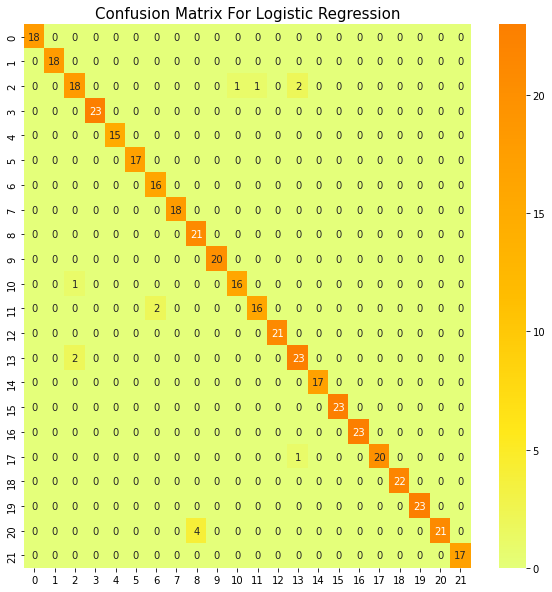

In [26]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

#Printing the Confusing Matrix
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [ ]:
#Defining the classification Report
from sklearn.metrics import classification_report

#Printing the Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
#head of dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
prediction = model.predict((np.array([[40, 20, 40, 20, 80, 7, 200]])))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['coconut']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
